## 데이터 속성 및 기술통계량 확인

In [45]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline

titanic_df = pd.read_csv("/home/piai/test/Practice/data/titanic.csv", engine="python")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 변수들의 결측 및 이상치 처리

In [47]:
titanic_df.isnull().sum() # Cabin과 Embarked에 결측치가 존재한다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

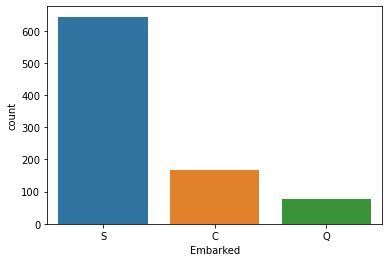

In [48]:
sns.countplot(x="Embarked", data=titanic_df)

: Embarked 데이터를 봤을 때, S가 많으므로, 2개의 결측치에 S을 넣는다.

In [49]:
titanic_df["Embarked"].fillna("S", inplace = True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

: PassengerId, Name, Cabin, Ticket 정보는 필요없으므로 column을 제거한다.

In [51]:
titanic_df.drop(['PassengerId', 'Name', "Cabin", "Ticket"], axis='columns', inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 목표변수(Survived) 및 설명변수의 분포 확인

In [52]:
# Survived, Pclass Object 타입으로 바꾸기
titanic_df = titanic_df.astype({'Survived':'object', 'Pclass':'object'})
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


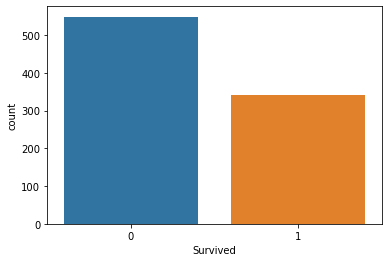

In [53]:
# Survived 분포
sns.countplot(x='Survived', data=titanic_df)

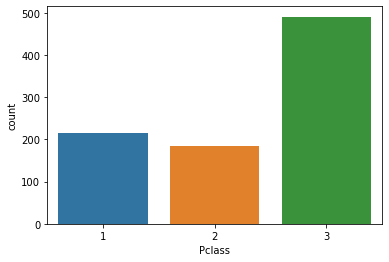

In [54]:
# Pclass 분포
sns.countplot(x='Pclass', data=titanic_df)

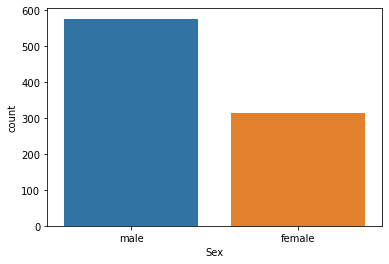

In [55]:
# Sex 분포
sns.countplot(x='Sex', data=titanic_df)

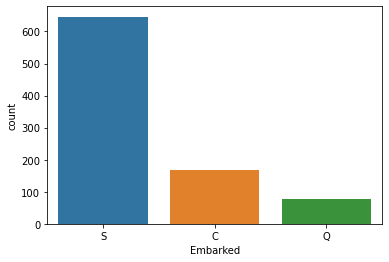

In [56]:
# Embarked 분포
sns.countplot(x='Embarked', data=titanic_df)

## 그래프 분석을 통해 변수간 관계를 확인

### 가설 설정1. 여성이 남성보다 생존률이 높을것이다.

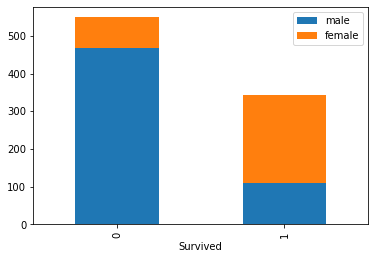

In [57]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('Survived','Sex',titanic_df).plot(kind='bar',stacked=True)

여성이 남성보다 생존률이 높은 것으로 나타났다.

### 가설 설정2. 나이가 어릴수록 생존률이 높을것이다.

In [58]:
# 연령대별로 분류하여 담아준다.
titanic_df['Age'] = (titanic_df['Age']//10)*10
titanic_df = titanic_df.astype({'Age':'int'})
# object로 바꿔준다.
titanic_df = titanic_df.astype({'Age':'object'})
titanic_df['Age'].value_counts()

30    344
20    220
10    102
40     89
0      62
50     48
60     19
70      6
80      1
Name: Age, dtype: int64

In [59]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 55.8+ KB


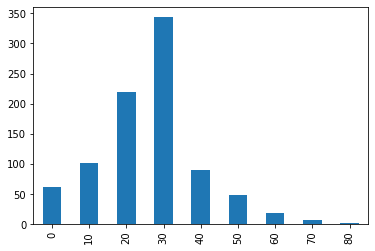

In [60]:
titanic_df['Age'].value_counts().sort_index().plot.bar()

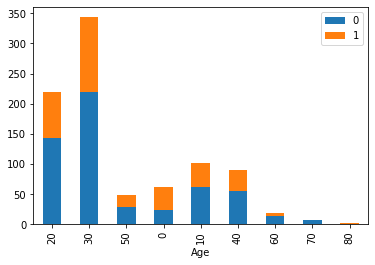

In [61]:
aggregate('Age','Survived',titanic_df).plot(kind='bar',stacked=True)

: 그려진 그래프를 분석해보니, 어릴수록 생존률이 올라갔다.

### 가설 설정3. 요금에 따라 생존 상관성이 있을 것이다.

Text(0.5, 1.0, 'Survived vs. Fare')

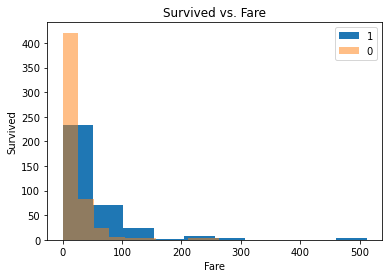

In [66]:
plt.hist(titanic_df[titanic_df["Survived"]==1]["Fare"], label="1", alpha = 1)
plt.hist(titanic_df[titanic_df["Survived"]==0]["Fare"], label="0", alpha = 0.5)
plt.legend()
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.title("Survived vs. Fare")

Text(0.5, 1.0, 'Survived vs. Fare')

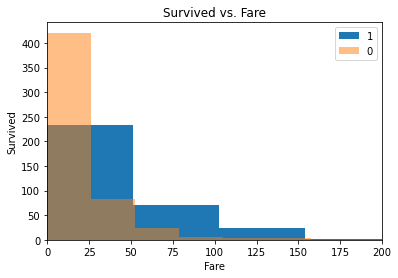

In [69]:
# 200달러 이상은 표본이 작으므로, 잘라내고 본다.
plt.hist(titanic_df[titanic_df["Survived"]==1]["Fare"], label="1", alpha = 1)
plt.hist(titanic_df[titanic_df["Survived"]==0]["Fare"], label="0", alpha = 0.5)
plt.legend()
plt.xlim(0,200)
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.title("Survived vs. Fare")

: 0~25달러 사이의 Fare 구간에서는 사망확률이 생존확률보다 높았고, 25달러 이상의 Fare 구간에서는 생존확률이 사망 확률보다 높았다.

### 가설 설정4. P-class가 높을수록 생존률이 높을 것이다.

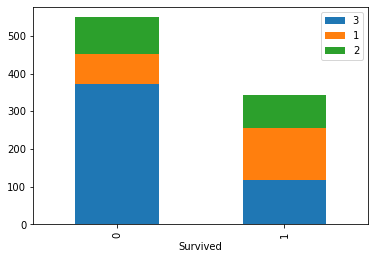

In [71]:
aggregate('Survived','Pclass',titanic_df).plot(kind='bar',stacked=True)

:위 결과를 보았을 때, 죽은 사람의 대부분은 3등급 Class에 탑승하고 있었다. 따라서, P-class와 생존률 사이에 상관관계가 있다는 결론을 내릴 수 있었다.